In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
from pytopo import topoplotIndie

In [54]:
## simulate data with covariance structure

# simulation parameters
N = 1000     # time points
M =   20     # channels
nTrials = 50 # number of trials

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# initialize data matrices
data = np.zeros( [2,M,N,nTrials] )

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))


# loop over "trials" and generate data
for triali in range(nTrials):
    
    # same phase on each trial
    data[0,:,:,triali] = np.outer(np.sin(t),chanrel).T + np.random.randn(M,N)
    
    # random phase on each trial
    shift = np.random.rand(1)*2*np.pi
    data[1,:,:,triali] = np.outer(np.sin(t+shift),chanrel).T + np.random.randn(M,N)

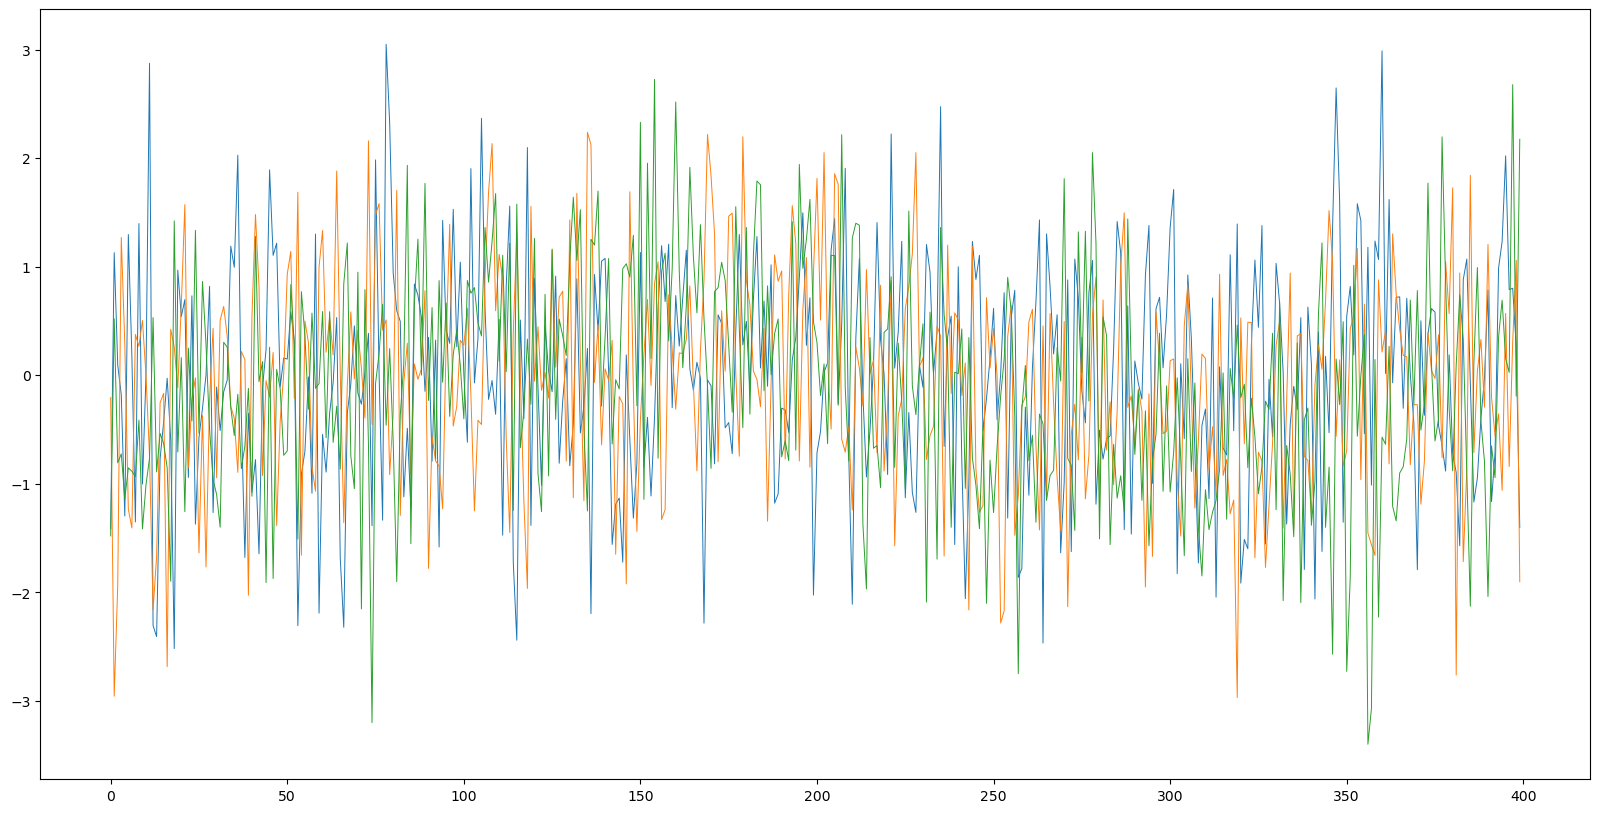

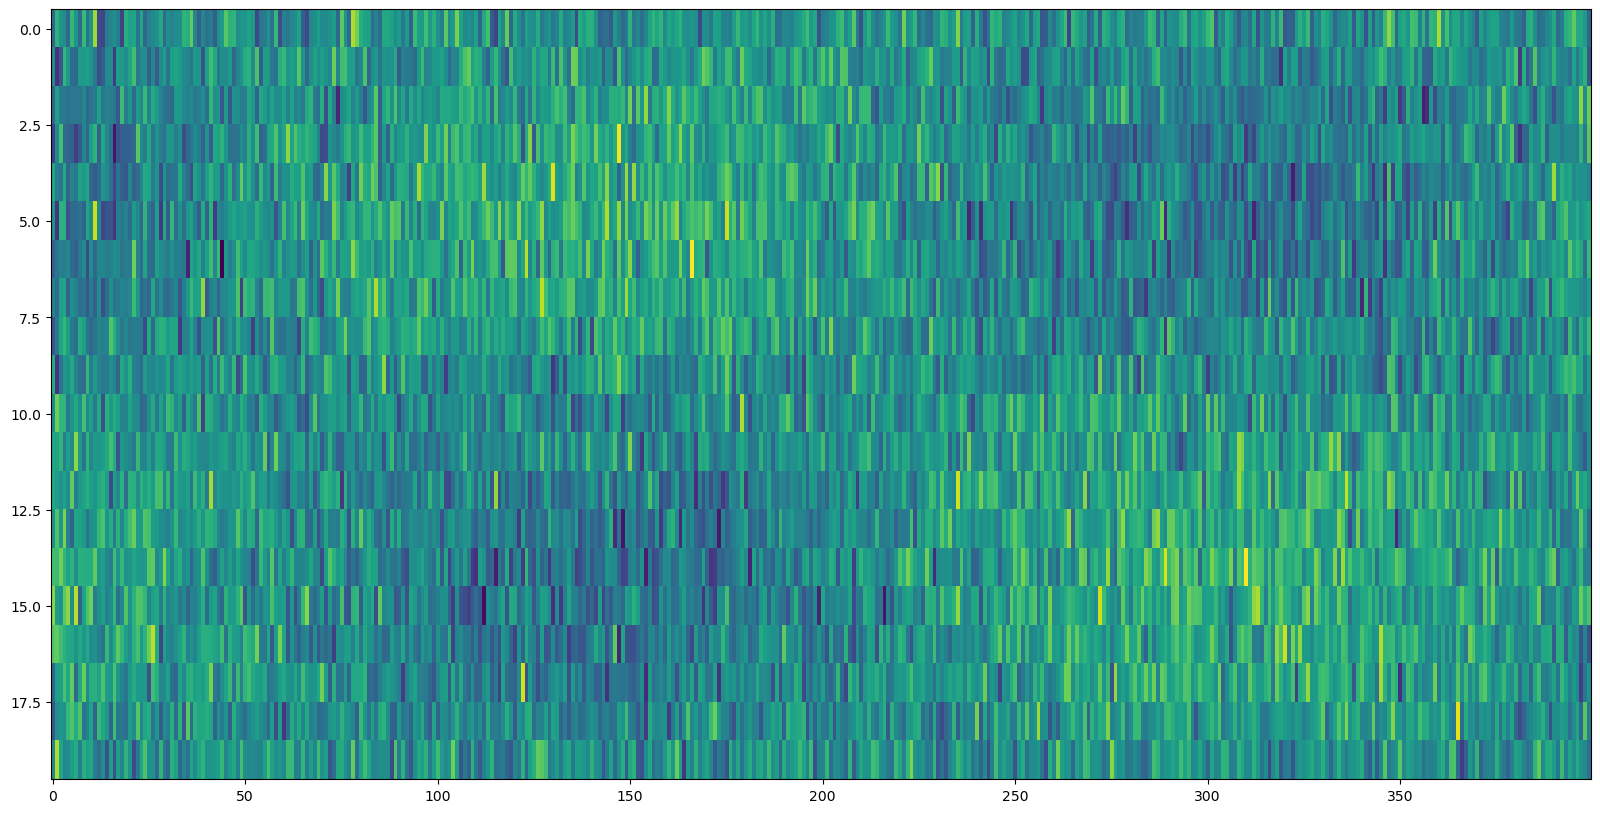

(2, 20, 1000, 50)

In [63]:
rawData = data[1,:,:,:];

plt.figure(figsize=(20,10))
plt.plot(data[1,0:3,0:400,1].T,'-',linewidth=.7)
plt.show()
plt.figure(figsize=(20,10))
plt.imshow(rawData[:,0:400,1])
plt.gca().set_aspect(10)
plt.show()

In [64]:
rawData.shape #chans time trials

(20, 1000, 50)

In [81]:

a = np.dsplit(rawData[:,:,:],rawData.shape[2])
covMats = np.zeros([rawData.shape[0],rawData.shape[0],rawData.shape[2]])
for sliceIndx in range(rawData.shape[2]):
    covSlice = rawData[:,:,sliceIndx]
    covMats[:,:,sliceIndx] = covSlice@covSlice.T

In [88]:
aveCovMat = np.mean(covMats,axis=2)

plt.imshow(aveCovMat)
plt.show()

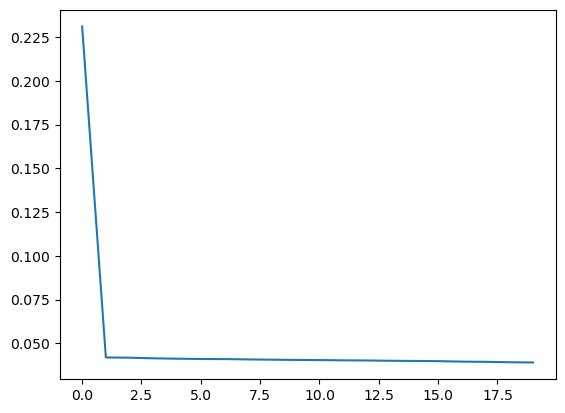

(20, 20) (20, 1000, 50)


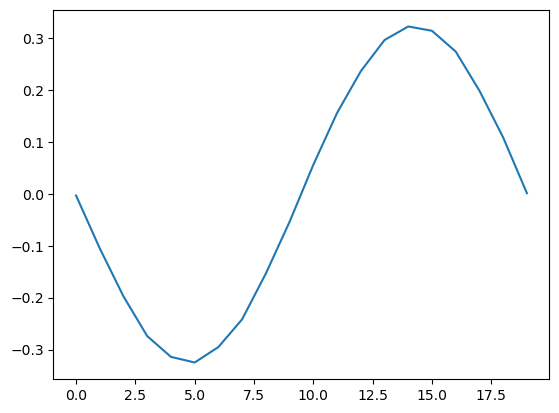

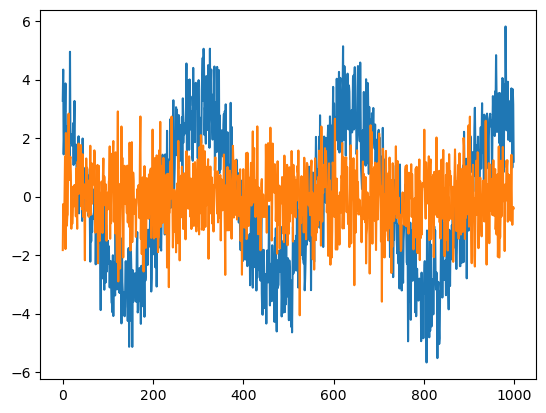

In [108]:
eigvals, eigvecs = np.linalg.eig(aveCovMat)

#sort the values and vectors
sortIdx = np.flip(np.argsort(eigvals))
eigvalsSorted = eigvals[sortIdx]
eigvecsSorted = eigvecs[:,sortIdx]
perVarExplained = eigvalsSorted/sum(eigvalsSorted)
plt.plot(perVarExplained)
plt.show()
print(eigvecsSorted.shape,rawData.shape)
PCs = eigvecsSorted[:,0:2].T@rawData[:,:,1]
plt.plot(eigvecs[:,0].T)
plt.show()
plt.plot(PCs.T)
plt.show()